# Exploratory Analysis of RAPTOR Metrics in the Modern NBA (1977-2023)

#### Presented by: Christopher Baker, Jonathan Carmichael, Jack Hayes, Wipawadee Naiyakhun, and Uzma Sayyeda
# ----------------------------------------------------------------------

### Importing data, merging datasets, and removing NaN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

from scipy.stats import linregress
import plotly.express as px
%matplotlib inline

In [2]:
# import our two CSVs
latest_df = pd.read_csv("CSVs/latest_RAPTOR_by_team.csv")
historical_df = pd.read_csv("CSVs/historical_RAPTOR_by_team.csv")

# merging both datasets
merged_df = pd.merge(historical_df, latest_df, how="outer")
merged_df

,player_name,player_id,season,season_type,team,poss,mp,raptor_offense,raptor_defense,raptor_total,...,predator_offense,predator_defense,predator_total,pace_impact,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total
0,Kareem Abdul-Jabbar,abdulka01,1977,PO,LAL,1020,467,6.350694,3.288313,9.639006,...,6.592019,3.065131,9.657150,-0.432080,NaN,NaN,NaN,NaN,NaN,NaN
1,Kareem Abdul-Jabbar,abdulka01,1977,RS,LAL,6654,3016,4.267101,3.075579,7.342679,...,4.482404,2.556956,7.039361,-0.513828,NaN,NaN,NaN,NaN,NaN,NaN
2,Zaid Abdul-Aziz,abdulza01,1977,RS,BUF,441,195,-1.926415,-0.368835,-2.295249,...,-1.817927,-1.624327,-3.442253,-0.751147,NaN,NaN,NaN,NaN,NaN,NaN
3,Tom Abernethy,abernto01,1977,PO,LAL,467,214,0.024715,-0.825643,-0.800928,...,-0.565843,-1.695077,-2.260920,-0.425337,NaN,NaN,NaN,NaN,NaN,NaN
4,Tom Abernethy,abernto01,1977,RS,LAL,3040,1378,0.517829,-0.459991,0.057838,...,0.141415,-0.835555,-0.694139,-0.315821,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30797,Omer Yurtseven,yurtsom01,2023,RS,MIA,177,83,2.486415,-7.487443,-5.001027,...,1.332271,-5.782120,-4.449850,0.241523,1.659495,-7.678176,-6.018681,5.109138,-4.382791,0.726346
30798,Cody Zeller,zelleco01,2023,PO,MIA,354,174,-3.408309,-1.285457,-4.693766,...,-3.123433,-2.253790,-5.377222,0.312978,-4.691477,-1.659638,-6.351115,3.038203,0.802259,3.840461
30799,Cody Zeller,zelleco01,2023,RS,MIA,447,217,-1.370539,-5.780102,-7.150641,...,-1.658070,-3.760831,-5.418901,0.311628,-1.382510,-5.605615,-6.988125,-1.018074,-4.713301,-5.731374
30800,Ivica Zubac,zubaciv01,2023,PO,LAC,274,130,-3.769316,8.511745,4.742429,...,-4.849337,5.794117,0.944780,0.534762,-3.282714,11.150790,7.868076,-4.475477,-5.323365,-9.798842


In [3]:
# removing null data
# raptor_box and raptor_onoff are only for 2013-onward

merged_df.fillna(0, inplace=True)
clean_df = merged_df
clean_df.isnull().sum()
clean_df.head()

,player_name,player_id,season,season_type,team,poss,mp,raptor_offense,raptor_defense,raptor_total,...,predator_offense,predator_defense,predator_total,pace_impact,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total
0,Kareem Abdul-Jabbar,abdulka01,1977,PO,LAL,1020,467,6.350694,3.288313,9.639006,...,6.592019,3.065131,9.657150,-0.432080,0.0,0.0,0.0,0.0,0.0,0.0
1,Kareem Abdul-Jabbar,abdulka01,1977,RS,LAL,6654,3016,4.267101,3.075579,7.342679,...,4.482404,2.556956,7.039361,-0.513828,0.0,0.0,0.0,0.0,0.0,0.0
2,Zaid Abdul-Aziz,abdulza01,1977,RS,BUF,441,195,-1.926415,-0.368835,-2.295249,...,-1.817927,-1.624327,-3.442253,-0.751147,0.0,0.0,0.0,0.0,0.0,0.0
3,Tom Abernethy,abernto01,1977,PO,LAL,467,214,0.024715,-0.825643,-0.800928,...,-0.565843,-1.695077,-2.260920,-0.425337,0.0,0.0,0.0,0.0,0.0,0.0
4,Tom Abernethy,abernto01,1977,RS,LAL,3040,1378,0.517829,-0.459991,0.057838,...,0.141415,-0.835555,-0.694139,-0.315821,0.0,0.0,0.0,0.0,0.0,0.0


### Defining Functions

In [4]:
## bar plot

def bar_plot(x_axis, y_axis, ylabel, title, size):
    fig, ax = plt.subplots(figsize=(size))
    bar_container= ax.bar(x_axis, y_axis, alpha=0.5, color="#F94C10")
    ax.bar_label(bar_container, fmt='{:,.0f}')
    plt.xlabel("Player Names", weight="bold")
    plt.ylabel(ylabel, weight="bold")
    plt.title(f"Top 20 {title}", weight="bold")
    plt.xticks(rotation=45)

    plt.show()

In [5]:
## linear regression

def regression_plot(x_axis, y_axis, xlabel, ylabel, text_coordinates, x=0, y=0):
    

    (slope, intercept, rvalue, pvalue, stderr)= st.linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq =  "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    plt.scatter(x_axis, y_axis, marker=r'8', c="#F94C10", s=50, alpha=0.7, edgecolor="#F94C10")
    plt.plot(x_axis, regress_values, "r:", alpha=0.5)
    plt.xlabel(xlabel, weight="bold")
    plt.ylabel(ylabel, weight="bold")
    plt.title(f"{xlabel} vs {ylabel} by Teams", color="#F94C10", weight="bold")
    plt.grid(True, color="b", alpha=0.10)
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="#F94C10")
    plt.annotate(line_eq, xy=(x, y), xycoords='axes fraction', fontsize=10, color="red")
    print(f"The r-value is: {rvalue**2}")
    for team, txt in enumerate(team_names):
        plt.annotate(txt, (x_axis[team], y_axis[team]), color="#F94C10",alpha=0.5)
        
    plt.show()

### Averages of various features by team

In [6]:
total_players=clean_df.groupby("team")["player_name"].count()
raptor_total=clean_df.groupby("team")["raptor_total"].mean()
poss=clean_df.groupby("team")["poss"].mean()
war_total=clean_df.groupby("team")["war_total"].mean()
pace_impact=clean_df.groupby("team")["pace_impact"].mean()
raptor_onoff_total=clean_df.groupby("team")["raptor_onoff_total"].mean()
avg_mp_team=clean_df.groupby("team")["mp"].mean()
avg_raptor_offense=clean_df.groupby("team")["raptor_offense"].mean()
avg_raptor_defense=clean_df.groupby("team")["raptor_defense"].mean()
avg_summary = pd.DataFrame({"Total Players": total_players,
          "Raptor Total": raptor_total,
          "Possessions": poss,
          "War Total": war_total,
          "Pace Impact": pace_impact,
          "Minutes Played":avg_mp_team,
          "Raptor On and Off Totals":raptor_onoff_total,
          "RAPTOR Offense": avg_raptor_offense,
          "RAPTOR Defense": avg_raptor_defense}).reset_index()
avg_summary.head()

,team,Total Players,Raptor Total,Possessions,War Total,Pace Impact,Minutes Played,Raptor On and Off Totals,RAPTOR Offense,RAPTOR Defense
0,ATL,1185,-1.570031,1642.004219,1.140147,0.263341,819.489451,0.018678,-1.187607,-0.382423
1,BOS,1222,-1.199087,1704.759411,1.448069,0.248033,838.174304,0.033699,-1.130326,-0.068761
2,BRK,340,-1.191441,1366.402941,0.843397,0.275703,666.041176,-0.316375,-1.077620,-0.113821
3,BUF,37,-2.715885,2382.189189,0.983682,0.180248,1068.513514,0.000000,-1.835151,-0.880735
4,CHA,380,-2.366248,1938.507895,0.952573,0.133151,975.000000,-0.145483,-1.909040,-0.457208


### Question 1: Do the amount of possessions per player greatly impact that player’s team's total RAPTOR ratings by season? Why or why not?

In [7]:
# defining a full list of players from both sets of data based on possessions and total RAPTOR scores

poss_raptor = clean_df.groupby(["player_name"])[["poss", "raptor_total"]].sum(numeric_only = None)
poss_raptor_df = pd.DataFrame(poss_raptor)

# reset index
poss_raptor_df = poss_raptor_df.reset_index()

# show
poss_raptor_df.head()

,player_name,poss,raptor_total
0,A.C. Green,81445,-5.311204
1,A.J. Bramlett,123,-9.820485
2,A.J. English,6393,-8.779331
3,A.J. Guyton,2362,-16.723745
4,A.J. Lawson,239,-29.105705


In [8]:
# setting dataframe to label top 20 players by possession total

by_poss = poss_raptor_df.groupby(["player_name"])[["raptor_total", "poss"]].sum().sort_values(by="poss", ascending=False)
by_poss = by_poss.reset_index()
by_poss = by_poss.head(20)

In [9]:
# setting dataframe to label top 20 players by RAPTOR total

by_raptor = poss_raptor_df.groupby(["player_name"])[["poss", "raptor_total"]].sum().sort_values(by="raptor_total", ascending=False)
by_raptor = by_raptor.reset_index()
by_raptor = by_raptor.head(20)

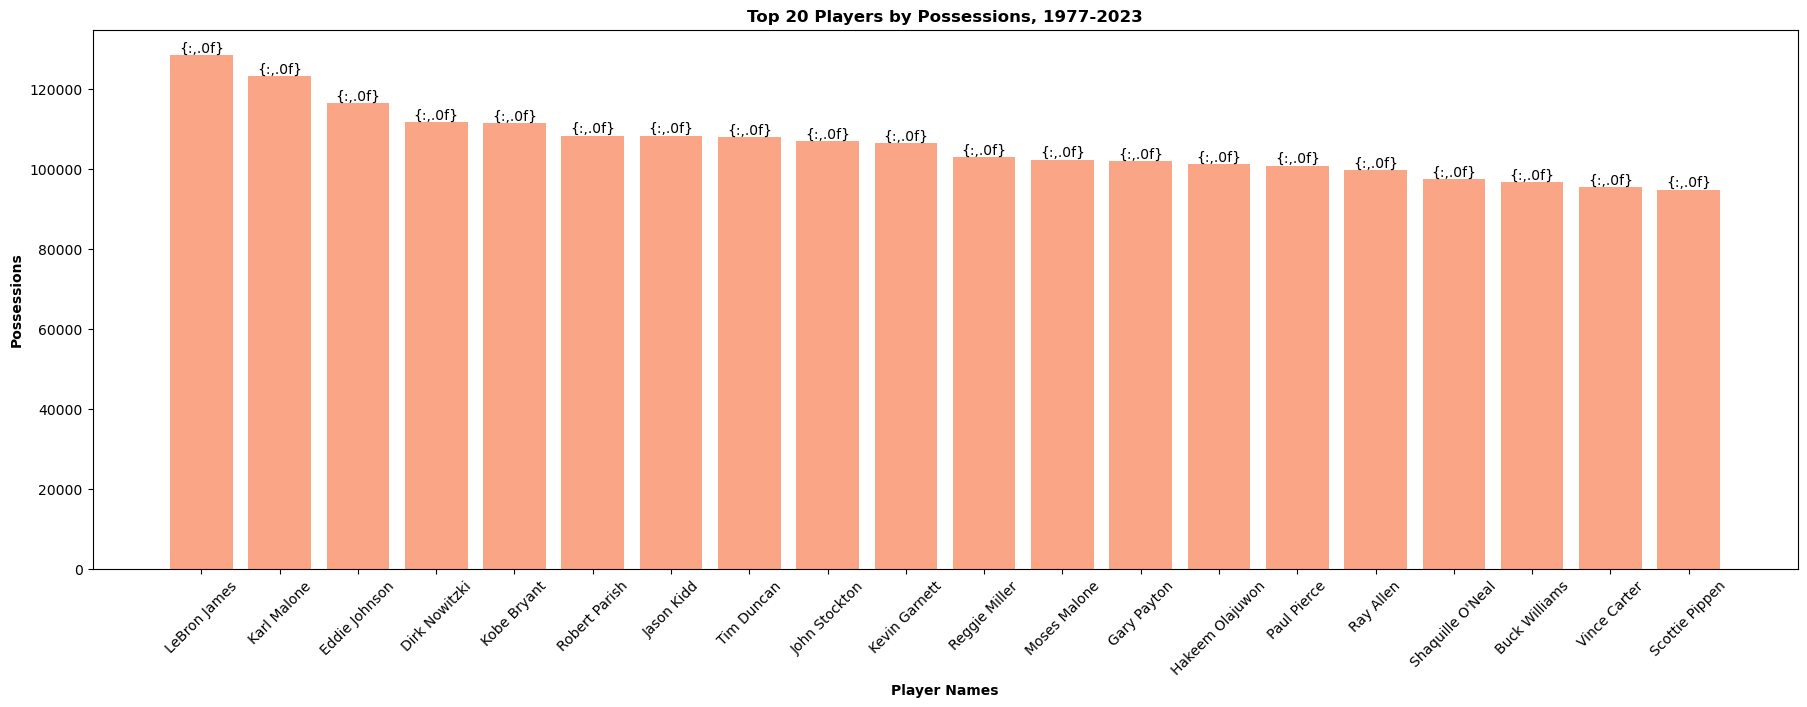

In [10]:
# Minutes played for top ten players

top_twenty_poss = poss_raptor_df[["player_name", "poss"]].\
sort_values(by="poss", ascending=False).head(20)

poss = top_twenty_poss["poss"]
player_names = top_twenty_poss["player_name"]

bar_plot(player_names, poss, "Possessions", "Players by Possessions, 1977-2023", (22,7))

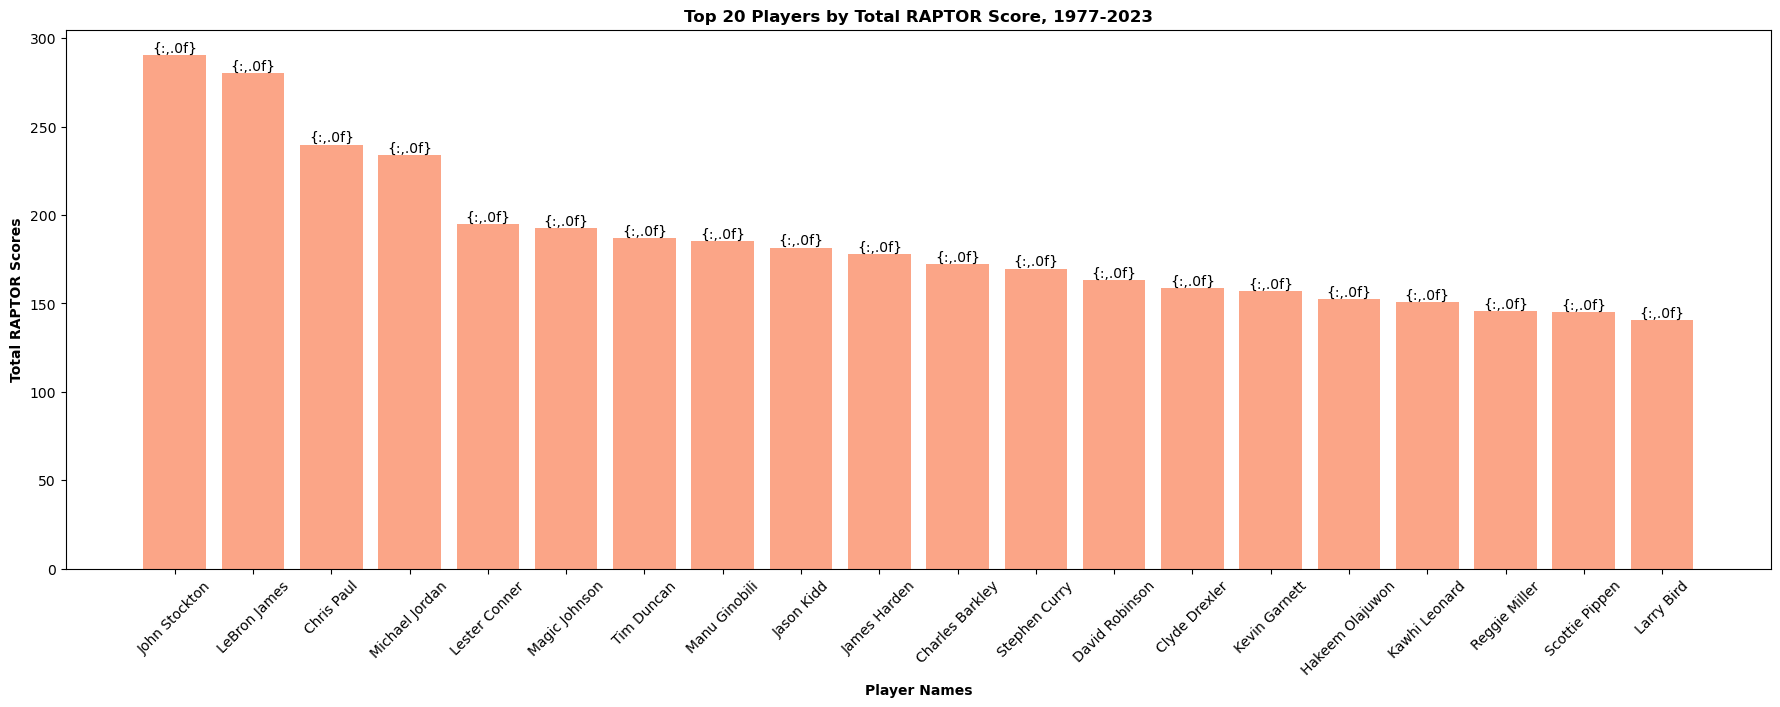

In [11]:
# graphing top players by RAPTOR total

top_twenty_raptor = poss_raptor_df[["player_name", "raptor_total"]].\
sort_values(by="raptor_total", ascending=False).head(20)

raptor = top_twenty_raptor["raptor_total"]
player_names = top_twenty_raptor["player_name"]

bar_plot(player_names, raptor, "Total RAPTOR Scores", "Players by Total RAPTOR Score, 1977-2023", (22,7))

In [12]:
# make a new dataframe to display by teams

total_players = clean_df.groupby("team")["player_name"].count()
raptor_total = clean_df.groupby("team")["raptor_total"].mean()
poss_total = clean_df.groupby("team")["poss"].mean()

team_poss_raptor = pd.DataFrame({"Total Players":total_players,
                                "Total RAPTOR Score":raptor_total,
                                "Total Possessions":poss_total})

team_poss_raptor.head()

,Total Players,Total RAPTOR Score,Total Possessions
team,,,
ATL,1185,-1.570031,1642.004219
BOS,1222,-1.199087,1704.759411
BRK,340,-1.191441,1366.402941
BUF,37,-2.715885,2382.189189
CHA,380,-2.366248,1938.507895


The r-value is: 0.19019525425278175


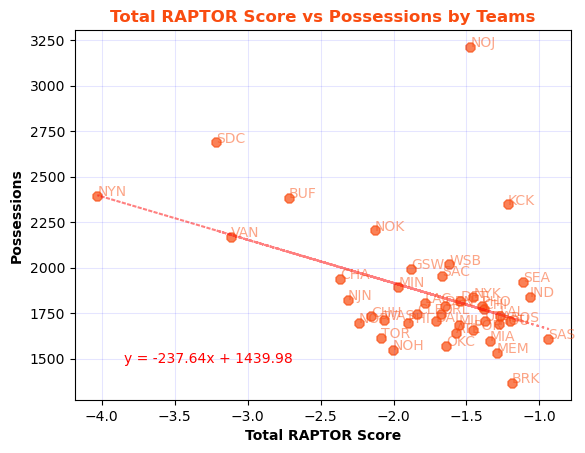

In [13]:
# linear regression for total RAPTOR score vs. total possessions

x_axis = avg_summary["Raptor Total"]
y_axis = avg_summary["Possessions"]
team_names = avg_summary["team"]

regression_plot(x_axis, y_axis, "Total RAPTOR Score", "Possessions", (-4,0.4), 0.1, 0.1)


## Question #2: Which team displayed the highest/lowest RAPTOR ratings across the 2022-23 season across all players? How does this data compare to their predictive PREDATOR model?

### Question #3: How accurate are the overall results of predictive-RAPTOR, which was used for the historical data charts (1977-2013), compared to those of modern RAPTOR’s integration (2013-Present)?

### Question #4: Which players had the most minutes played and the greatest pace impact on their team compared to their total RAPTOR scores?

In [15]:
# Data wrangling
# Filter columns

df=clean_df[["player_name","mp","raptor_total","pace_impact"]]
df.head(2)

# Get the totals of minutes played,pace impact and raptor totals of each player.

total_mp=df.groupby("player_name")["mp"].sum()
total_pace_impact=df.groupby("player_name")["pace_impact"].sum()
total_raptor=df.groupby("player_name")["raptor_total"].sum()

# Make it into a Dataframe

total_mp_pace_raptor = pd.DataFrame({"Total_Minutes_Played": total_mp,
                             "Total_Pace_Impact": total_pace_impact,
                             "Total_RAPTOR_Scores": total_raptor})
total_mp_pace_raptor=total_mp_pace_raptor.reset_index()

# Display the Dataframe

total_mp_pace_raptor.head(2)

,player_name,Total_Minutes_Played,Total_Pace_Impact,Total_RAPTOR_Scores
0,A.C. Green,40671,-14.631130,-5.311204
1,A.J. Bramlett,61,0.527413,-9.820485


#### Top 10 Pace Impact per Player

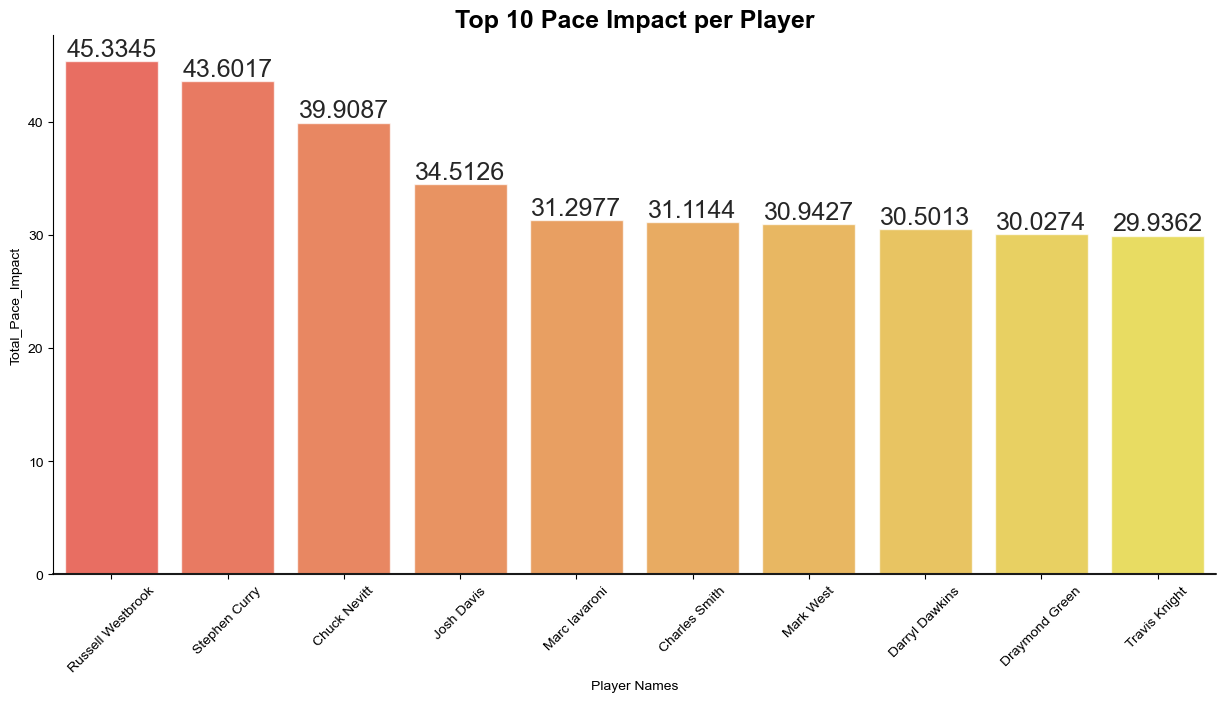

In [17]:
top_pace=total_mp_pace_raptor[["player_name","Total_Pace_Impact"]].sort_values(by="Total_Pace_Impact",ascending=False)
top_10_pace=top_pace.head(10)


f, (ax) = plt.subplots(figsize=(15,7))
sns.set_theme(style="white", context="notebook",font_scale=1.5)

sns.barplot(x="player_name",
            y="Total_Pace_Impact",
            data=top_10_pace,
            palette="autumn",
            alpha=0.7)

for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation=45)
plt.xlabel("Player Names")
plt.title("Top 10 Pace Impact per Player",weight="bold")
ax.axhline(0,color="k",clip_on=False)
sns.despine(bottom=True)
plt.show()

#### Top 10 Minutes Played per Player

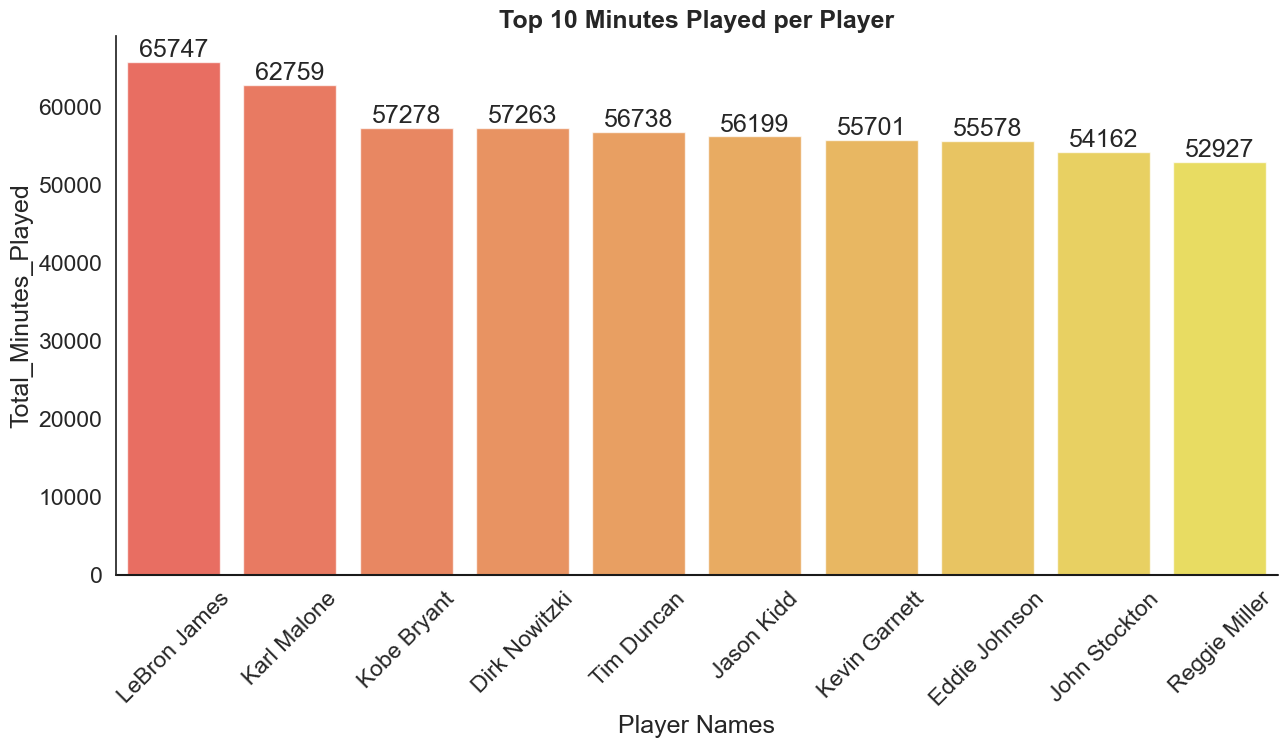

In [18]:
top_mp=total_mp_pace_raptor[["player_name","Total_Minutes_Played"]].sort_values(by="Total_Minutes_Played",ascending=False)
top_10_mp=top_mp.head(10)

f, (ax) = plt.subplots(figsize=(15,7))
sns.set_theme(style="white", context="notebook",font_scale=1.5)

sns.barplot(x="player_name",
            y="Total_Minutes_Played",
            data=top_10_mp,
            palette="autumn",
            alpha=0.7)
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation=45)
plt.xlabel("Player Names")
plt.title("Top 10 Minutes Played per Player",weight="bold")
ax.axhline(0,color="k",clip_on=False)
sns.despine(bottom=True)
plt.show()


#### Top Ten RAPTOR scores per Player

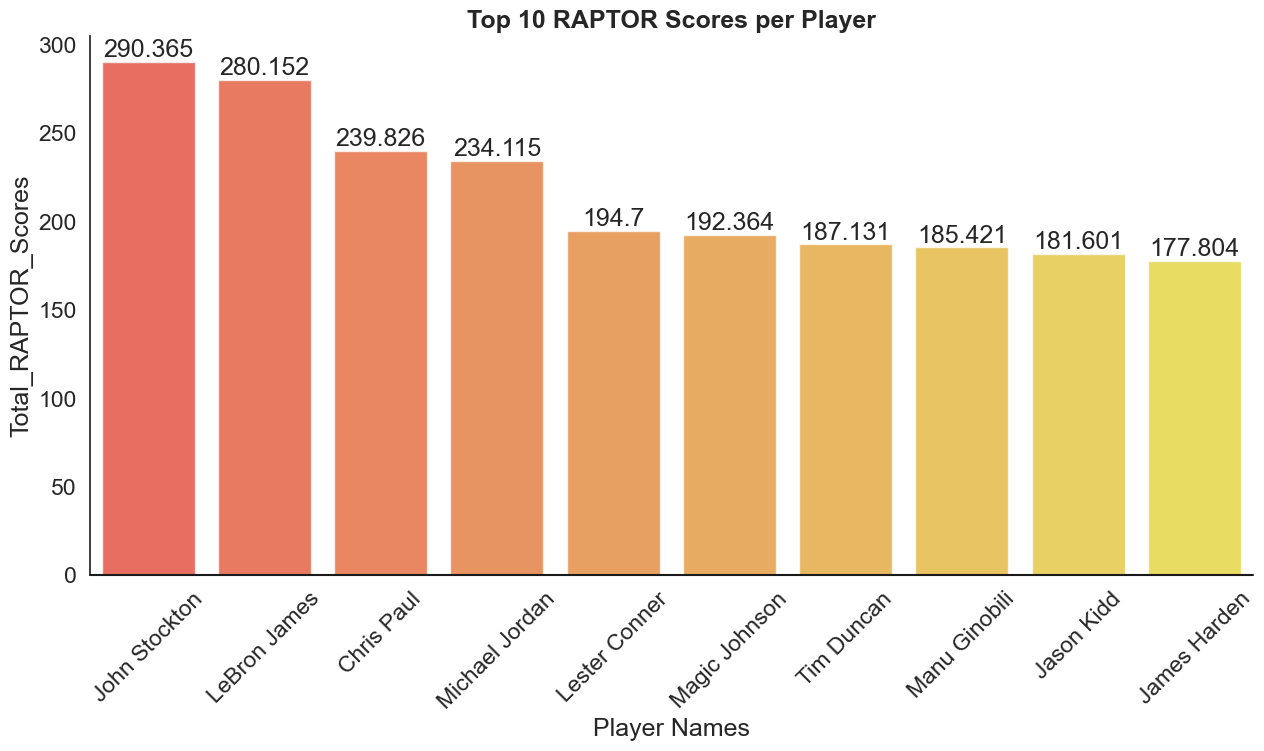

In [19]:
top_10_raptors=total_mp_pace_raptor[["player_name","Total_RAPTOR_Scores"]].sort_values(by="Total_RAPTOR_Scores",ascending=False)
top_10_raptors=top_10_raptors.head(10)

f, (ax) = plt.subplots(figsize=(15,7))
sns.set_theme(style="white", context="notebook",font_scale=1.5)

sns.barplot(x="player_name",
            y="Total_RAPTOR_Scores",
            data=top_10_raptors,
            palette="autumn",
            alpha=0.7)
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation=45)
plt.xlabel("Player Names")
plt.title("Top 10 RAPTOR Scores per Player",weight="bold")
ax.axhline(0,color="k",clip_on=False)
sns.despine(bottom=True)
plt.show()

#### Minutes Played vs. RAPTOR Scores for top 20 players

In [35]:
top_20_mp=total_mp_pace_raptor.sort_values(by="Total_Minutes_Played",ascending=False)
top_20_mp=top_20_mp.head(20)

fig = px.scatter(top_20_mp,
                 x="Total_RAPTOR_Scores",
                 y="Total_Minutes_Played",
                 color="player_name",
                 color_discrete_sequence=px.colors.sequential.Oranges,
                 size='Total_Minutes_Played',
                 template="plotly_white",
                 title="Minutes Played vs. RAPTOR Scores",
                 hover_data=['player_name'])
# fig.update_traces(showlegend=False)
fig.show()

#### Pace Impact vs RAPTOR Scores for top 20 Players

In [34]:
top_20_pace=total_mp_pace_raptor[["player_name","Total_Pace_Impact","Total_RAPTOR_Scores"]].sort_values(by="Total_Pace_Impact",ascending=False)
top_20_pace=top_20_pace.head(20)

fig = px.scatter(top_20_pace,
                 x="Total_RAPTOR_Scores",
                 y="Total_Pace_Impact",
                 color="player_name",
                 color_discrete_sequence=px.colors.sequential.OrRd,
                 size='Total_Pace_Impact',
                 template="plotly_white",
                 title="Pace Impact vs. RAPTOR Scores",
                 hover_data=['player_name'])

# fig.update_traces(showlegend=False)
fig.show()

### Question #5: How do these statistics line up by player in relation to the top players/teams (MVPs) of the 2022-2023 season?

### Evaluations and Results: What are some key differences between those who had a final RAPTOR score that was either positive versus negative?

### Analysis

#### Correaltion Matrix

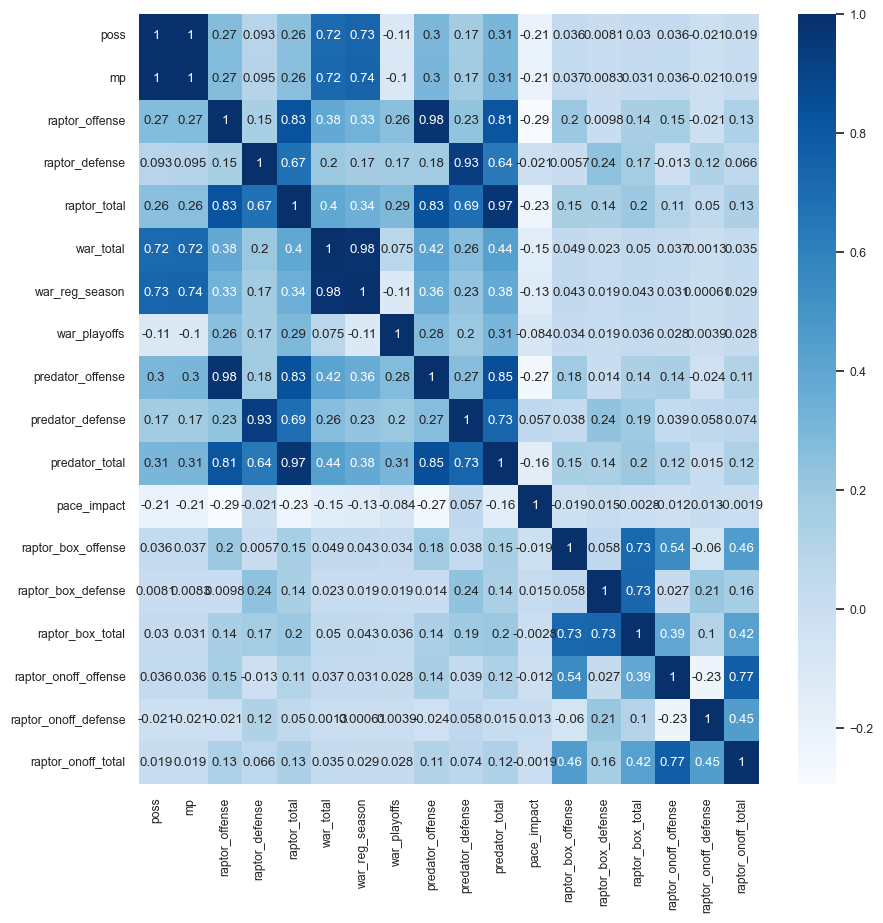

In [28]:
# Filter the clean dataframe for desired features
# Needs more filtering

df_mx=clean_df[['poss',
       'mp', 'raptor_offense', 'raptor_defense', 'raptor_total', 'war_total',
       'war_reg_season', 'war_playoffs', 'predator_offense',
       'predator_defense', 'predator_total', 'pace_impact',
       'raptor_box_offense', 'raptor_box_defense', 'raptor_box_total',
       'raptor_onoff_offense', 'raptor_onoff_defense', 'raptor_onoff_total']].corr()

# plot a heatmap 

plt.figure(figsize=(10,10))
sns.set_context("notebook",font_scale=0.8)

sns.heatmap(df_mx, annot=True, cmap="Blues")
plt.show()

#### Team vs Season vs Raptor Scores

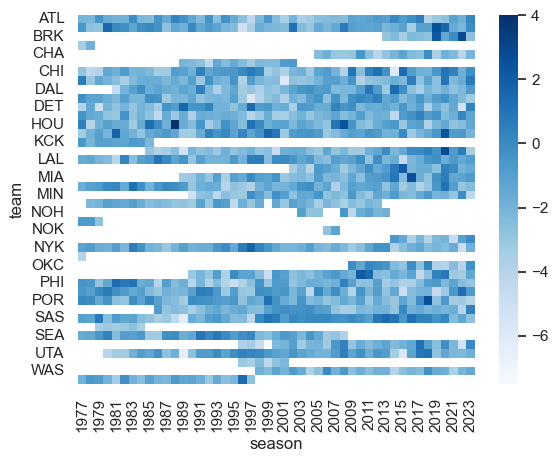

In [30]:
# Filter the data
cluster_plot=clean_df[["season","team","raptor_total"]]

# Plot a pivot table and assign varibale name

cluster_plot=cluster_plot.pivot_table(index="team",columns="season",values="raptor_total")

# Plot a heatmap

sns.set_context("notebook")
sns.heatmap(cluster_plot, cmap="Blues")
plt.show()